# Breast Cancer - Partie II

## Realise en python 3 avec sklearn et Keras (Breast Cancer dataset)
 - Importation bibliotheque
 - Exploration, analyse statistique et traitement des donnees
 - Creation d'un modele de perceptron simple 
     - apprentissage et evaluation sur le jeu de donnees
 - Creation de modele de perceptron multi-couche (reseau de neurones)
     - apprentissage et evaluation sur le jeu de donnees

### Importation des bibliotheques

In [1]:
#Importation des bibliotheques
import numpy as np # pour l'algebre lineaire
import pandas as pd # pour traiter des donnes

import matplotlib.pyplot as plt # pour creer les figures
%matplotlib inline
import seaborn as sns # pour la visualisation des donnees
import pandas_profiling as pd_r
sns.set_style('whitegrid')

# pour creer les modeles
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split # pour decouper les donnees
from sklearn.model_selection import GridSearchCV # pour l'optimisation de nos modeles
from sklearn.preprocessing import LabelEncoder # pour encoder les donnees
from sklearn.preprocessing import Normalizer # pour normaliser les donnees

# pour evaluer les modeles
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_curve

### Traitement des donnees

In [2]:
# Importation des donnees
df = pd.read_csv('data/df_breastCancer.csv', delimiter = ';')

In [3]:
df.columns # les noms des colonnes du jeu de donnees

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.head() # afficher par defaut les cinq premiere lignes du jeu de donnees

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe() # effectuer des analyses statisque sur le jeu de donnees

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#df.head()
df['diagnosis'].unique() # afficher les valeurs unique de la variable de sortie de type categoriel

array(['M', 'B'], dtype=object)

### Visualisation des donnees

In [7]:
df.values # afficher les listes de valeurs du jeu de donnees

array([['M', 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       ['M', 20.57, 17.77, ..., 0.18600000000000003, 0.275, 0.08902],
       ['M', 19.69, 21.25, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       ['M', 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       ['M', 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       ['B', 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

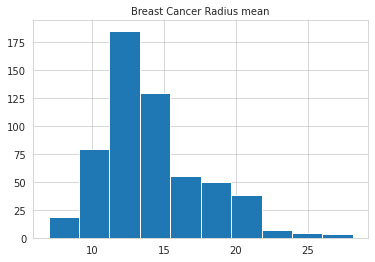

In [8]:
# repartition de la variable 'radius_mean'
plt.hist(df['radius_mean'])
plt.title('Breast Cancer Radius mean', fontsize=10)
plt.savefig("Radius_mean_histo.png")
plt.show()

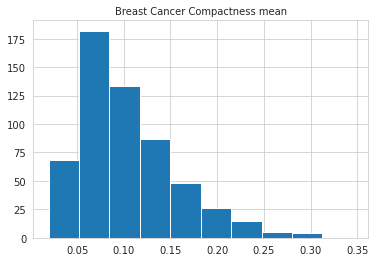

In [9]:
# repartition de la variable 'compactness_mean'
plt.hist(df['compactness_mean'])
plt.title('Breast Cancer Compactness mean', fontsize=10)
plt.savefig("compactness_mean_histo.png")
plt.show()

In [10]:
df.isna().sum() # pour verifier s'il y a des valeurs manquantes

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.info() # informations sur les colonnes du jeu de donnees

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
# jusque-la nos variables sont toutes quantitatives sauf "diagnostics" qui elle est categorielle
# alors, le but ici, c'est d'encoder cette variable afin qu'elle devienne elle aussi quantitative 
# car dans notre cas, pour certains traitements, comme lors de la creation et l'entrainement du 
# modele et autres, les donnees non quantitatives ne pourront pas traiter par les algos.
i = df.columns[0] 
encoder = LabelEncoder()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])

In [13]:
df['diagnosis'].unique() # et maintenant, les nouvelles valeurs sont affichees, 1 ou 0

array([1, 0])

In [14]:
# en changeant le format des nombres (pour une meilleure lecture)
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.74,0.46,0.75,0.73,0.37,0.61,0.73,0.78,0.33,...,0.79,0.48,0.79,0.79,0.43,0.61,0.70,0.78,0.40,0.31
radius_mean,0.74,1.00,0.35,1.00,1.00,0.16,0.50,0.65,0.77,0.13,...,0.98,0.32,0.97,0.98,0.13,0.49,0.60,0.73,0.18,0.05
texture_mean,0.46,0.35,1.00,0.35,0.34,0.02,0.26,0.34,0.31,0.11,...,0.37,0.91,0.37,0.37,0.10,0.29,0.34,0.32,0.12,0.11
perimeter_mean,0.75,1.00,0.35,1.00,1.00,0.18,0.54,0.68,0.79,0.15,...,0.98,0.32,0.98,0.98,0.16,0.53,0.63,0.76,0.20,0.09
area_mean,0.73,1.00,0.34,1.00,1.00,0.14,0.49,0.64,0.76,0.11,...,0.98,0.32,0.97,0.98,0.12,0.49,0.59,0.72,0.17,0.04
smoothness_mean,0.37,0.16,0.02,0.18,0.14,1.00,0.68,0.52,0.57,0.53,...,0.21,0.06,0.22,0.19,0.80,0.48,0.43,0.50,0.39,0.51
compactness_mean,0.61,0.50,0.26,0.54,0.49,0.68,1.00,0.90,0.85,0.55,...,0.54,0.25,0.59,0.53,0.58,0.90,0.84,0.82,0.45,0.69
concavity_mean,0.73,0.65,0.34,0.68,0.64,0.52,0.90,1.00,0.93,0.45,...,0.69,0.33,0.71,0.67,0.49,0.85,0.94,0.90,0.38,0.54
concave points_mean,0.78,0.77,0.31,0.79,0.76,0.57,0.85,0.93,1.00,0.43,...,0.79,0.30,0.81,0.78,0.49,0.76,0.83,0.94,0.36,0.42
symmetry_mean,0.33,0.13,0.11,0.15,0.11,0.53,0.55,0.45,0.43,1.00,...,0.17,0.12,0.18,0.15,0.43,0.44,0.40,0.40,0.71,0.41


In [15]:
# et si je normalise mes donnees avant meme de les decouper afin de creer mon modele...
# d'abord, sachez que cette operation c'est pour une mise a la meme echelle des valeurs
# de toutes les colonnes du jeu de donnees. alors, allons-y maintenant...
normalizer = Normalizer(copy=False)
X = df.drop(['diagnosis'], axis=1) # supprimons 'diagnosis' de notre df
X = normalizer.fit_transform(X) # normalisons notre df
y = df[['diagnosis']] # sauvegardons 'diagnosis' dans une variable de sortie "y"

### Decoupage du jeu de donnees

In [16]:
# Separation des donnees en train set et test set
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

# Meilleurs resultat avec: test_size = 0.33 pr DT Model; test_size = 0.1 pour LDA Model, LR Model, NBG Model 
# SVM Model,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20) 
print(len(X_train),'données d\'apprentissage')
print(len(X_test),'données de test')

398 données d'apprentissage
171 données de test


In [17]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,370,1,455,452,444,531,521,526,416,483,...,425,41,497,516,358,516,520,483,485,506
1,426,186,486,513,120,215,321,396,219,91,...,419,199,465,511,158,210,278,401,222,375
2,406,324,478,487,403,459,478,516,348,184,...,399,261,455,491,287,464,438,468,445,361
3,98,297,164,95,471,533,507,493,426,498,...,215,298,281,194,408,524,511,479,499,533
4,418,60,493,506,332,414,480,492,216,147,...,381,28,453,470,239,245,415,363,81,216


In [18]:
# Affiche les classes a partir de la variable y
y.unique()

array([1, 0])

### Modele de perceptron simple (Apprentissage, evaluation et visualisation)

In [19]:
# Modele Perceptron
pc_model = Perceptron(tol=1e-3, random_state=40)
pc_model = pc_model.fit(X_train, y_train)
pc_model

Perceptron(random_state=40)

In [20]:
# Accuracy sur l'ensemble d'apprentissage et de test
pc_train_acc = "%.3f" % accuracy_score(y_train, pc_model.predict(X_train))
pc_test_acc = "%.3f" % accuracy_score(y_test, pc_model.predict(X_test))


print("Accuracy train: ", pc_train_acc)
print("Accuracy test: ", pc_test_acc)

Accuracy train:  0.910
Accuracy test:  0.871


In [21]:
# Prediction sur le modele avec le jeu de test
y_pred = pc_model.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1]


In [22]:
# Matrice de confusion du modele
pc_cfm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Etiquette predite (Valeur predite)')

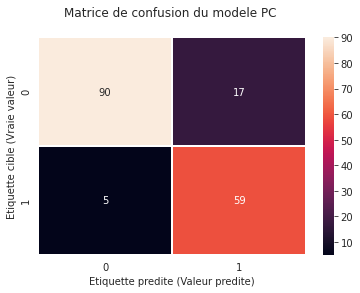

In [23]:
# Visualisation de la matrice de confusion
sns.heatmap(pc_cfm, annot = True, linewidths = .5, cbar = True)
plt.title('Matrice de confusion du modele PC \n')
plt.ylabel('Etiquette cible (Vraie valeur)')
plt.xlabel('Etiquette predite (Valeur predite)')

In [24]:
# Calcul d'autres mesures d'evaluation
print("Rapport d\'evaluation du modele Perceptron sur l'ensemble de test \n\n", classification_report(y_test, y_pred))

Rapport d'evaluation du modele Perceptron sur l'ensemble de test 

               precision    recall  f1-score   support

           0       0.95      0.84      0.89       107
           1       0.78      0.92      0.84        64

    accuracy                           0.87       171
   macro avg       0.86      0.88      0.87       171
weighted avg       0.88      0.87      0.87       171



### Modele de Perceptron Multi-couche (Apprentissage, evaluation et visualisation)

In [55]:
# Modele de perceptron multi-couche
mlp_model = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
                          beta_2=0.999, early_stopping=False, epsilon=1e-08,
                          hidden_layer_sizes=(100,), learning_rate='constant',
                          learning_rate_init=0.001, max_iter=200, momentum=0.9,
                          n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                          random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
                          validation_fraction=0.1, verbose=False, warm_start=False)
mlp_model = mlp_model.fit(X_train, y_train)
mlp_model

MLPClassifier(alpha=1e-05, solver='lbfgs')

In [56]:
# Accuracy sur l'ensemble d'apprentissage et de test
mlp_train_acc = "%.3f" % accuracy_score(y_train, mlp_model.predict(X_train))
mlp_test_acc = "%.3f" % accuracy_score(y_test, mlp_model.predict(X_test))


print("Accuracy train: ", mlp_train_acc)
print("Accuracy test: ", mlp_test_acc)

Accuracy train:  1.000
Accuracy test:  0.912


In [57]:
# Prediction sur le modele avec le jeu de test
y_pred = mlp_model.predict(X_test)
print(y_pred)

[0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0]


In [58]:
# Matrice de confusion du modele
mlp_cfm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Etiquette predite (Valeur predite)')

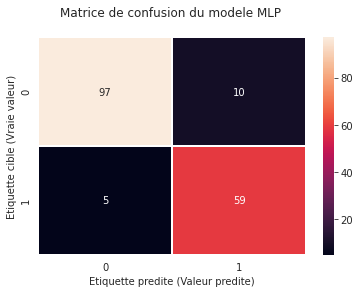

In [59]:
# Visualisation de la matrice de confusion
sns.heatmap(mlp_cfm, annot = True, linewidths = .5, cbar = True)
plt.title('Matrice de confusion du modele MLP \n')
plt.ylabel('Etiquette cible (Vraie valeur)')
plt.xlabel('Etiquette predite (Valeur predite)')

/home/sinatechnologie/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sinatechnologie/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sinatechnologie/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sinatechnologie/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

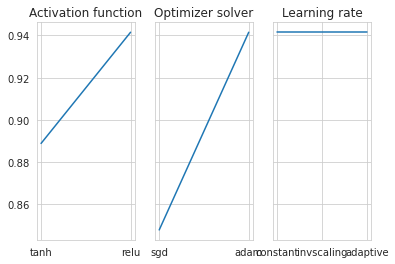

In [60]:
# Pour trouver les meilleurs parametre d'optimisation du perceptron multicouche
f, (ax2, ax3, ax4) = plt.subplots(1, 3, sharey=True) # aligner trois colonnes sur une ligne

# Fonction d'activation
mlp_acc = []
mlp_activation = ['tanh', 'relu']
for i in mlp_activation:
    mlp = MLPClassifier(random_state=40, activation=i)
    mlp.fit(X_train, y_train)
    mlp_acc.append(mlp.score(X_test, y_test))
ax2.plot(mlp_activation,mlp_acc)
ax2.set_title('Activation function')

# Optimiseur
mlp_acc = []
mlp_solver = ['sgd', 'adam']
for i in mlp_solver:
    mlp = MLPClassifier(random_state=40, solver=i)
    mlp.fit(X_train, y_train)
    mlp_acc.append(mlp.score(X_test, y_test))
ax3.plot(mlp_solver,mlp_acc)
ax3.set_title('Optimizer solver')

# Parametre d'apprentissage
mlp_acc = []
mlp_lr = ['constant','invscaling','adaptive']
for i in mlp_lr:
    mlp = MLPClassifier(random_state=40, learning_rate=i)
    mlp.fit(X_train, y_train)
    mlp_acc.append(mlp.score(X_test, y_test))
ax4.plot(mlp_lr,mlp_acc)
ax4.set_title('Learning rate')

plt.show()

#### Otimisation du modele perceptron multicouche avec GridSearchCV

In [61]:
# parametres d'optimisation
param = {
    'hidden_layer_sizes': [(100,),(200,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','invscaling','adaptive'],
}
# Optimisation du modele avec GridSearchCV
mlp_random = GridSearchCV(mlp_model, param, n_jobs=-1, cv=5)
mlp_random.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(alpha=1e-05, solver='lbfgs'),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['sgd', 'adam']})

In [62]:
mlp_random.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (200,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [63]:
# Accuracy sur l'ensemble d'apprentissage et de test apres optimisation
mlp_rd_train_acc = "%.3f" % accuracy_score(y_train, mlp_random.predict(X_train))
mlp_rd_test_acc = "%.3f" % accuracy_score(y_test, mlp_random.predict(X_test))
print("Accuracy train: ", mlp_train_acc)
print("Accuracy test: ", mlp_test_acc)

Accuracy train:  1.000
Accuracy test:  0.912


### Commentaire
- Apres optimisation, notre score d'evaluation sur le jeu de test n'augmente pas.

## Modele de reseau de neurones avec Keras

### 1. Perceptron avec une seule couche cachee

In [34]:
# importation des librairies pour les reseaux de neurones
from tensorflow.keras.models import Sequential # instancie les modeles keras
from tensorflow.keras.layers import Dense, InputLayer # pour les couches d'entree, completement connectees
from tensorflow.keras.utils import to_categorical # pour encoder les classes en keras
from tensorflow.keras import optimizers # function d'optimisation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # pour monitorer le processus d'apprentissage

In [35]:
# Importation et decoupage des donnees pour les modeles Perceptron 1 et 2
data = pd.read_csv("data/df_breastCancer.csv", delimiter = ';')

# encoder la variable de sortie avec LabelEncoder de Sklearn
i = data.columns[0] 
encoder = LabelEncoder()
for i in data.columns:
    data[i] = encoder.fit_transform(data[i])

    
# Decoupage du jeu de donnees pour le modele
'''
Sans one hot encoding...
X_data = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis'] 
'''
X_data = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']
# y = to_categorical(y, num_classes=2) dans le cas si on avait plus que deux classes par exemple, en keras le hot encoding est une bonne solution
data_train, data_test, target_train, target_test = train_test_split(X_data, y, test_size = 0.3, 
                                                                    random_state = 40)

In [36]:
data['diagnosis'].unique() # les classes a predire

array([1, 0])

In [37]:
model = Sequential() # instancie le modele keras
model.add(Dense(1, input_dim=30, activation='relu')) # une premiere couche entierement connectee, activation relu
model.add(Dense(1, activation='sigmoid')) # seconde couche dense, activation sigmoid, sortie du reseau
model.summary() # pour afficher les details du modeles

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compilation du modele
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
# Pour sauver le meilleur modele et arreter l'apprentissage a temps
checkpoint = ModelCheckpoint("Model_/Model_Perceptron.h5",
                             monitor = "val_loss", 
                             mode = "min", 
                             save_best_only = True,
                             verbose = 1
                            )
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, # Abs value and is the min change required before we stop
                          patience = 3, # Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) # keeps the best weigths once stopped

callbacks = [checkpoint, earlystop]

In [39]:
# Apprentissage du modele
history = model.fit(data_train, target_train,
          epochs=100,
          batch_size=4,
          validation_split=0.33,
          shuffle = True,
          callbacks = callbacks,
        )
# Evaluation de la performance du modele entrainne
scores = model.evaluate(data_test, target_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/100
58/67 [========================>.....] - ETA: 0s - loss: 1.2997 - accuracy: 0.7112    
Epoch 00001: val_loss improved from inf to 2.06617, saving model to Model_/Model_Perceptron.h5
67/67 [==============================] - 0s 6ms/step - loss: 1.1882 - accuracy: 0.7143 - val_loss: 2.0662 - val_accuracy: 0.6970
Epoch 2/100
55/67 [=======================>......] - ETA: 0s - loss: 0.4940 - accuracy: 0.6864
Epoch 00002: val_loss improved from 2.06617 to 2.06147, saving model to Model_/Model_Perceptron.h5
67/67 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.6767 - val_loss: 2.0615 - val_accuracy: 0.6970
Epoch 3/100
51/67 [=====================>........] - ETA: 0s - loss: 0.4986 - accuracy: 0.6716
Epoch 00003: val_loss did not improve from 2.06147
67/67 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.6767 - val_loss: 2.0816 - val_accuracy: 0.6970
Epoch 4/100
36/67 [===============>..............] - ETA: 0s - loss: 0.5071 - a

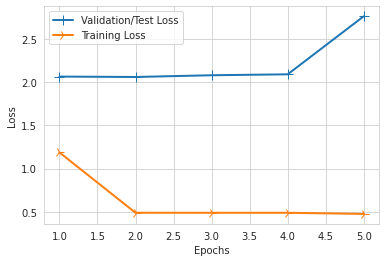

In [40]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

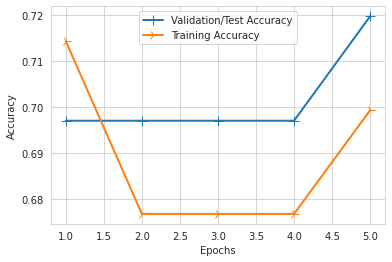

In [41]:
# Plotting our accuracy charts

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
_, test_acc = model.evaluate(data_test, target_test)
print(test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6023
0.6023392081260681


### 2. Perceptron avec dix couches cachees
#### Pour optimiser la performance de notre modele perceptron multicouche.

In [43]:
model1 = Sequential()
model1.add(Dense(10, input_dim=30, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compilation du modele
model1.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# Pour sauver le meilleur modele et arreter l'apprentissage a temps
checkpoint1 = ModelCheckpoint("Model_/Model1_Perceptron2.h5",
                             monitor = "val_loss", 
                             mode = "min", 
                             save_best_only = True,
                             verbose = 1
                            )
earlystop1 = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, # Abs value and is the min change required before we stop
                          patience = 3, # Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) # keeps the best weigths once stopped

callbacks1 = [checkpoint1, earlystop1]

In [45]:
# Apprentissage du modele
history = model1.fit(data_train, target_train,
          epochs=80,
          batch_size=4,
          validation_split=0.33,
          shuffle = True,
          callbacks = callbacks1
        )
# Evaluation de la performance du modele entrainne
scores = model1.evaluate(data_test, target_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/80
55/67 [=======================>......] - ETA: 0s - loss: 82.6807 - accuracy: 0.6545 
Epoch 00001: val_loss improved from inf to 5.98698, saving model to Model_/Model1_Perceptron2.h5
67/67 [==============================] - 0s 3ms/step - loss: 69.2593 - accuracy: 0.6767 - val_loss: 5.9870 - val_accuracy: 0.8030
Epoch 2/80
48/67 [====================>.........] - ETA: 0s - loss: 5.9600 - accuracy: 0.8073
Epoch 00002: val_loss improved from 5.98698 to 4.97874, saving model to Model_/Model1_Perceptron2.h5
67/67 [==============================] - 0s 2ms/step - loss: 5.2284 - accuracy: 0.8083 - val_loss: 4.9787 - val_accuracy: 0.8106
Epoch 3/80
57/67 [========================>.....] - ETA: 0s - loss: 4.1668 - accuracy: 0.8202
Epoch 00003: val_loss improved from 4.97874 to 3.63125, saving model to Model_/Model1_Perceptron2.h5
67/67 [==============================] - 0s 2ms/step - loss: 4.0825 - accuracy: 0.8271 - val_loss: 3.6312 - val_accuracy: 0.8561
Epoch 4/80
40/67 [===========

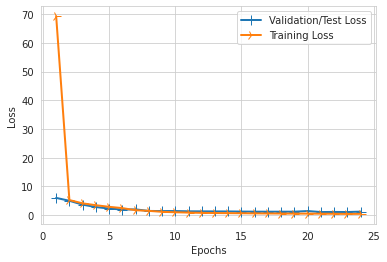

In [46]:
# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

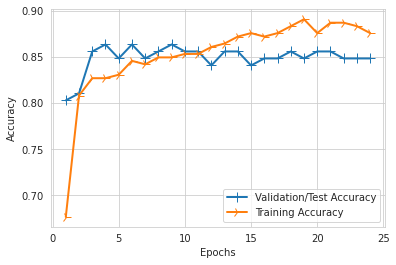

In [47]:
# Plotting our accuracy charts

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
_, test_acc = model1.evaluate(data_test, target_test)
print(test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.9754 - accuracy: 0.8363
0.8362573385238647


### Perceptron avec cent couches cachees
#### En quete de meilleure performance, j'optimise encore en rajoutant d'autres couches cachees

In [49]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(25,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )
my_filepath = "Model_/Model_Perceptron.h5"
checkpoint2 = ModelCheckpoint(filepath = my_filepath,
                             monitor = "val_loss", 
                             mode = "min", 
                             save_best_only = True,
                             verbose = 1
                             )
earlystop2 = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )
callbacks2 = [checkpoint2, earlystop2]

In [51]:
history = model2.fit(data_train, target_train,
          epochs = 20,
          batch_size=2,
          validation_split=0.3,
          shuffle = True,
          callbacks = callbacks2
          )
# Evaluation de la performance du modele entrainne
scores = model2.evaluate(data_test, target_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/20
125/139 [=========================>....] - ETA: 0s - loss: 7.6300 - accuracy: 0.7920   
Epoch 00001: val_loss improved from inf to 1.65020, saving model to Model_/Model_Perceptron.h5
139/139 [==============================] - 0s 2ms/step - loss: 7.6247 - accuracy: 0.7914 - val_loss: 1.6502 - val_accuracy: 0.9250
Epoch 2/20
105/139 [=====================>........] - ETA: 0s - loss: 5.7368 - accuracy: 0.8381  
Epoch 00002: val_loss did not improve from 1.65020
139/139 [==============================] - 0s 1ms/step - loss: 5.9589 - accuracy: 0.8453 - val_loss: 6.7161 - val_accuracy: 0.8083
Epoch 3/20
122/139 [=========================>....] - ETA: 0s - loss: 2.7056 - accuracy: 0.8893
Epoch 00003: val_loss improved from 1.65020 to 0.90432, saving model to Model_/Model_Perceptron.h5
139/139 [==============================] - 0s 2ms/step - loss: 2.7534 - accuracy: 0.8885 - val_loss: 0.9043 - val_accuracy: 0.9167
Epoch 4/20
139/139 [==============================] - ETA: 0s - loss:

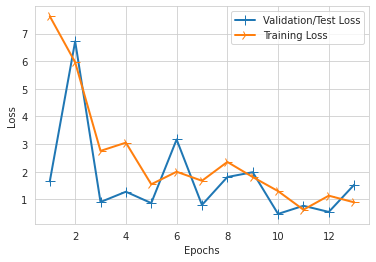

In [52]:
# Plotting our loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

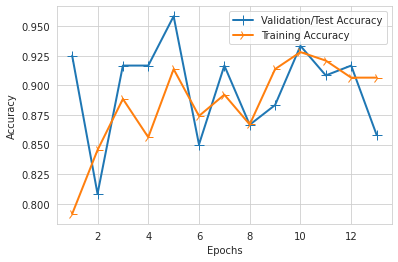

In [53]:
# Plotting our accuracy charts

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [54]:
_, test_acc = model2.evaluate(data_test, target_test)
print(test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.8184 - accuracy: 0.9064
0.9064327478408813


### Commentaires
- En ajoutant plus de couches cachees a notre reseau de neurones on obtient de meilleures performances.